In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

FileNotFoundError: [Errno 2] No such file or directory: 'hwk3-task1-spills.ipynb'

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 3 GitHub repository:

**UPDATE THIS LINK**
https://github.com/ryangreen6/eds220-hwk3


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?usp=sharing) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

- Delete all the comments initially included in this notebook (ex: `# Your code here`).


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
You can find extra information and metadata for this dataset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 


## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your `git` workflow if you try to push them. Your `data/` directory should not be in your GitHub repository.

## 2. Datasets description
Read the metadata for both datsets and write a description about each one. Indicate the date sources and date of access.


*Your answer here.*

## 3. Import libraries

In [34]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [ ]:
spills = pd.read_csv('data/Spill_Incidents_20241104.csv')
counties = gpd.read_file('data/tl_2023_us_county.shp')

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head.

b. Check the data types of the columns.

c. Check the unique values in the `material_family` column.

d. Check the unique values in the `county` column.

You can add other cells for preliminary data exploration.

In [ ]:
# a. Check the dataframe's head
spills.head()

In [ ]:
# b. Check the data types of the columns
spills.dtypes

In [ ]:

# c. Checking unique values in the Material Family column of the dataframe `spills`
spills['Material Family'].unique()

In [ ]:
# d. Checking unique values in the County column of the dataframe `spills`
spills['County'].unique()

In [ ]:
# Adding another preliminary exploration step
spills.shape

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

I used `.shape` to determine the number of rows and columns of the dataframe to better understand its size. 

<!-- END QUESTION -->

*Your answer here.*

### 5.B. Cleaning
a. Simplify column names as needed.

b. Update column data types as needed. If you're not sure if any data types are needed at this point, you may come back later to this cell.

In [ ]:
# a. Simplifying column names
spills.columns = spills.columns.str.lower().str.replace(' ', '_')

In [ ]:
# b. Updating `spill_date` column to `datetime` data type
spills['spill_date'] = pd.to_datetime(spills['spill_date'])

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st 2023 (including both dates). Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [ ]:
# a. Selecting petroleum spills in 2023
petr_23 = spills[(spills['spill_date'] >= '2023-01-01') & (spills['spill_date'] <= '2023-10-31') & (spills["material_family"] == "Petroleum")]

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print messages verifying that `petr_23` only has data for 2023 and from January through October.
HINT: [pandas.Series.dt.year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html) and [pandas.Series.dt.month](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html).

In [ ]:
# b. Verifying that `petr_23` has only petroleum spills from 2023, using f-strings
years = petr_23['spill_date'].dt.year.unique()
months = petr_23['spill_date'].dt.month.unique()

# Print verification messages
print(f"Unique years in petr_23: {years}")
print(f"Unique months in petr_23: {months}")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [ ]:
# c. Using an `assert` test to verify that `petr_23` has only petroleum spills
unique_materials = petr_23['material_family'].unique()
assert unique_materials == ['Petroleum'], \
    f"Non-petroleum material families found: {unique_materials}"

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new data frame named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Data frame has two columns only:
    - Column one: county names, column name = `county`
    - Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.


In [ ]:
# Creating new dataframe with the number of spills per county in 2023
spills_per_county = petr_23.groupby('county').size().reset_index(name='n_spills')[['county', 'n_spills']]
spills_per_county

## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head.

b. Check the data types of the columns.

c. Check the geo-dataframe's CRS.

d. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [ ]:
# a. Check the geo-dataframe's head
counties.head()

In [ ]:
# b. Check the data types of the columns
counties.dtypes

In [ ]:
# c. Check the geo-dataframe's CRS
counties.crs

In [ ]:
# d. Plot the geo-dataframe
counties.plot()

In [ ]:
# One more preliminary data exploration step
print(counties['NAME'].nunique())

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

I used `.nunique()` to check how many unqieu counties there are in the dataframe.

*Your answer here.*

<!-- END QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [ ]:
# Simplifying column names
counties.columns = counties.columns.str.lower().str.replace(' ', '_')

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them.

In [ ]:
# Plotting the `ny_counties` geodataframe
ny_counties = counties[counties['statefp'] == '36']
ny_counties.plot()

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.


In [ ]:
# a. Print the names of counties in ny_counties, without repetition
ny_counties['name'] = ny_counties['name'].str.replace(' County', '', regex=False)
print(ny_counties['name'].unique())

In [ ]:
# b. Print the names of counties in spills_per_county, without repetition
print(spills_per_county['county'].unique())



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 



In [ ]:
# Finding the different names from `spills_per_county` and `ny_counties`
diff_names = np.setdiff1d(spills_per_county['county'], ny_counties['name'])
diff_names


d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [ ]:
# Finding the different names from `ny_counties` and `spills_per_county`
diff_names_ny = np.setdiff1d(ny_counties['name'], spills_per_county['county'])
diff_names_ny




e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [ ]:
# e. Finding spills for Tuscarora Indian Reservation, of which there is only 1
print(spills_per_county[spills_per_county['county'] == "Tuscarora Indian Reservation"]['n_spills'])

### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and use an `assert` statement to verify that the update was successful.

You may add cells if needed.

In [ ]:
# Updating name of St. Lawrence county, and using `assert` to confirm the change
spills_per_county['county'] = spills_per_county['county'].replace('St Lawrence', 'St. Lawrence')
assert (spills_per_county['county'] == 'St. Lawrence').any(), 'Update failed'

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [ ]:
# a. Merging `ny_counties` and `spills_per_county` by column `county`; this cell and next cell
ny_counties = ny_counties.rename(columns={'name': 'county'})
ny_counties

In [ ]:
# b. Merge cell
ny_counties = pd.merge(ny_counties, spills_per_county, on='county', how='inner')


From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [ ]:
# c. Identifying the `Niagara` county column to confirm number of spills
ny_counties[ny_counties['county'] == 'Niagara']

In [ ]:
# Adding one more spill to Niagara County, to account for the Tuscarora Reservation
ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills'] += 1

ny_counties[ny_counties['county'] == 'Niagara']

<!-- BEGIN QUESTION -->

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an [annotation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) with the data source (New York State Department of Environmental Conservation) and date of access.



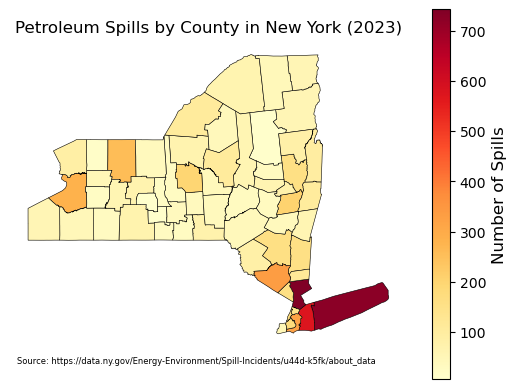

In [31]:
# a. Creating chloropleth map of petroleum spills across New York State

fig, ax = plt.subplots()


ax = ny_counties.plot(ax=ax, 
                      column = "n_spills", 
                      linewidth = 0.4,
                      edgecolor = "black", 
                      cmap = "YlOrRd")


ax.annotate(
    "Source: https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk/about_data", 
    xy=(-75, 45),
    xytext=(-80, 40),
    #textcoords="offset points",
    fontsize=6,
    color="black"
)

sm = plt.cm.ScalarMappable(cmap='YlOrRd', 
                           norm=plt.Normalize(vmin=ny_counties['n_spills'].min(), 
                                              vmax=ny_counties['n_spills'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Number of Spills", fontsize=12)

ax.set_axis_off()
ax.set_title('Petroleum Spills by County in New York (2023)')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Write a figure description for the map, including tha names of the top 3 counties with the most petroleum spills. If you need to do additional data analysis to include relevant information from the data, you may include additional code cells here.

This figure is a chloropleth map displaying the number of petroleum spills per county in the state of New York in 2023. The three counties that experienced the most spills were Westchester (743 spills), Suffolk (723 spills), and Nassau (576 spills) counties. The data for this figure was sourced from the New York State government website: https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk/about_data